<a href="https://colab.research.google.com/github/jordan-dsouza/OIBSIP/blob/main/Indian_Unemploy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import calendar
import datetime as dt
sns.set()

In [ ]:
#Loading the dataset:
df = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
#Display the dataset:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
#Dataset information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [ ]:
#Checking for null values:
df.isnull().sum()
#No null values.

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

#**Dataframe formatting:**

Abbreviating text inorder to easily view data:
1. EUR - Estimated Unemployment Rate (%).
2. EE - Estimated Employed.
3. ELPR - Estimated Labour Participation Rate (%).

In [ ]:
#EUR - Estimated Unemployment Rate (%), EE - Estimated Employed, ELPR - Estimated Labour Participation Rate (%):
df.columns = ['States', 'Date', 'Frequency', 'EUR%', 'EE', 'ELPR%', 'Region', 'Longitude', 'Latitude']

#pd.to_datetime() converts date and time in string format to a DateTime object:
df["Date"] = pd.to_datetime(df["Date"], dayfirst = True)
#Month number from date:
df["Month_num"] = df["Date"].dt.month
#Month name abbrievated using calendar library:
df["Month_name"] = df["Month_num"].apply(lambda a: calendar.month_abbr[a])

#Frequency and Region are categorical variables:
df["Frequency"] = df["Frequency"].astype("category")
df["Region"] = df["Region"].astype("category")

df.head()

,States,Date,Frequency,EUR%,EE,ELPR%,Region,Longitude,Latitude,Month_num,Month_name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


#**Exploratory Data Analysis:**

In [ ]:
#.describe() describes the dataset, .T transposes table for better viewing:
df_statistics = df[["EUR%", "EE", "ELPR%"]]
round(df_statistics.describe(include = "all").T, 2)

,count,mean,std,min,25%,50%,75%,max
EUR%,267.0,12.24,10.80,0.50,4.84,9.65,16.76,75.85
EE,267.0,13962105.72,13366318.36,117542.00,2838930.50,9732417.00,21878686.00,59433759.00
ELPR%,267.0,41.68,7.85,16.77,37.26,40.39,44.06,69.69


In [ ]:
#Statistics in every state:
state_stat = round(df.groupby(["States"])[["EUR%", "EE", "ELPR%"]].mean().reset_index(), 2)
state_stat

,States,EUR%,EE,ELPR%
0,Andhra Pradesh,8.66,15425480.00,38.96
1,Assam,4.86,10810275.50,43.50
2,Bihar,19.47,23606828.00,37.17
3,Chhattisgarh,7.82,8421349.20,41.16
4,Delhi,18.41,4632821.90,35.86
5,Goa,12.17,442374.80,39.24
6,Gujarat,6.38,22730746.10,45.49
7,Haryana,27.48,6844059.00,42.10
8,Himachal Pradesh,16.07,2033884.90,40.25
9,Jammu & Kashmir,16.48,3310031.67,37.89


In [ ]:
#Regional statistics:
region_stat = round(df.groupby(["Region"])[["EUR%", "EE", "ELPR%"]].mean().reset_index(), 2)
region_stat.T

,0,1,2,3,4
Region,East,North,Northeast,South,West
EUR%,13.92,15.89,10.95,10.45,8.24
EE,19602366.9,13072487.92,3617105.53,14040589.33,18623512.72
ELPR%,40.11,38.7,52.06,40.44,41.26


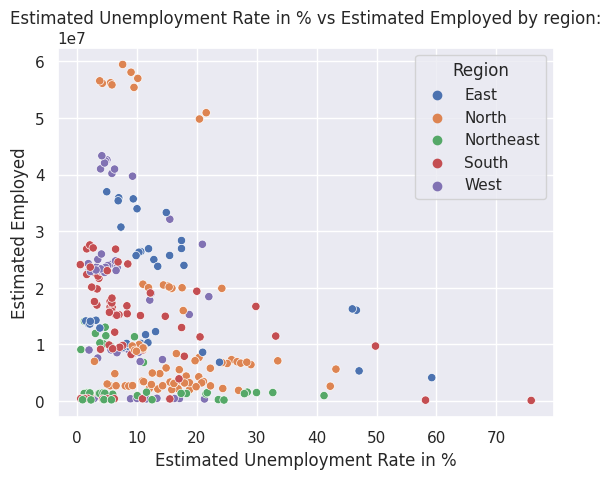

In [ ]:
sns.scatterplot(x = df["EUR%"], y = df["EE"], hue = df["Region"])
plt.title("Estimated Unemployment Rate in % vs Estimated Employed by region:")
plt.xlabel("Estimated Unemployment Rate in %")
plt.ylabel("Estimated Employed")
plt.show()

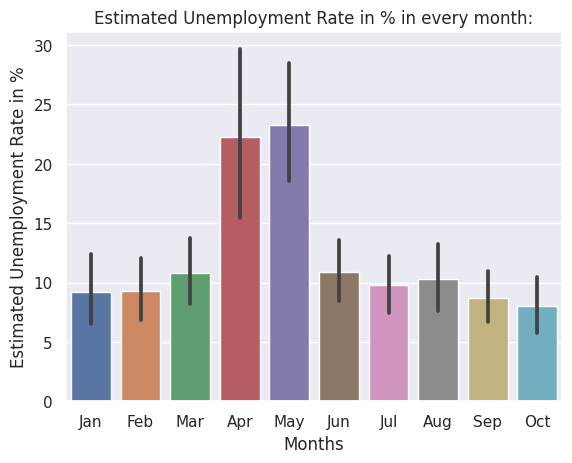

In [ ]:
sns.barplot(x = "Month_name", y = "EUR%", data = df)
plt.title("Estimated Unemployment Rate in % in every month:")
plt.xlabel("Months")
plt.ylabel("Estimated Unemployment Rate in %")
plt.show()

<Axes: >

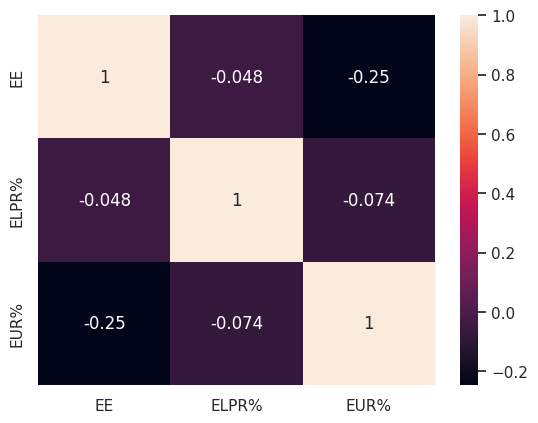

In [ ]:
h = df[["EE", "ELPR%", "EUR%"]]
sns.heatmap(h.corr(), annot = True)

#**Lockdown impact:**
Lockdown was implemented on March 24th 2020:

In [ ]:
df1 = df.copy()
df1.head()

,States,Date,Frequency,EUR%,EE,ELPR%,Region,Longitude,Latitude,Month_num,Month_name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


In [ ]:
#Before lockdown:
b_lock = df1[(df1["Month_num"] >= 1) & (df1["Month_num"] <=3)]
before_lock = b_lock.groupby("States")["EUR%"].mean().reset_index()
#After lockdown:
lock = df1[(df1["Month_num"] >= 4) & (df1["Month_num"] <=6)]
lockdown = lock.groupby("States")["EUR%"].mean().reset_index()

lockdown["Unemployment % before lockdown"] = before_lock["EUR%"]
lockdown.columns = ["States","Unemployment % after lockdown","Unemployment % before lockdown"]

lockdown.head()

,States,Unemployment % after lockdown,Unemployment % before lockdown
0,Andhra Pradesh,13.750000,5.700000
1,Assam,7.070000,4.613333
2,Bihar,36.806667,12.110000
3,Chhattisgarh,9.380000,8.523333
4,Delhi,25.713333,18.036667


In [ ]:
#Unemployment % change:
lockdown["Unemployment % change"] = round((lockdown["Unemployment % after lockdown"] - lockdown["Unemployment % before lockdown"])/
                                          lockdown["Unemployment % before lockdown"])
lockdown.head()

,States,Unemployment % after lockdown,Unemployment % before lockdown,Unemployment % change
0,Andhra Pradesh,13.750000,5.700000,1.0
1,Assam,7.070000,4.613333,1.0
2,Bihar,36.806667,12.110000,2.0
3,Chhattisgarh,9.380000,8.523333,0.0
4,Delhi,25.713333,18.036667,0.0


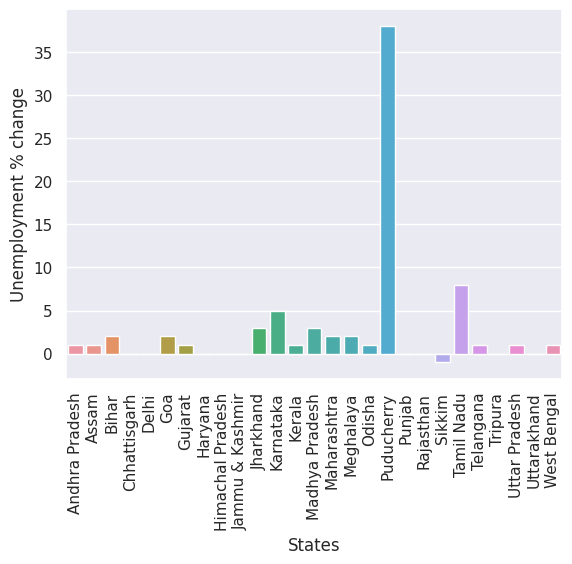

In [ ]:
sns.barplot(x = "States", y = "Unemployment % change", data = lockdown)
plt.title("Unemployment % change in every state:")
plt.xticks(rotation = 90)
plt.show()